In [2]:
from processing_functions import create_df

df = create_df(timeFramesUsedInMinutes=["1"], instrument="ES", 
                    start_date = "2023-03-24 12:00", end_date = "2025-02-14 12:00") 

In [ ]:
tickSize = 0.25
# Calculer la taille de chaque bougie (différence entre Open et Close)
df['CandleSize'] = abs(df['close'] - df['open'])/tickSize

# Extraire l'heure de chaque enregistrement
df['Hour'] = df['datetime'].dt.hour

# Calculer la taille moyenne des bougies pour chaque heure de la journée
average_candle_size_by_hour_in_tcks = df.groupby('Hour')['CandleSize'].agg()

TypeError: Must provide 'func' or named aggregation **kwargs.

In [23]:
average_candle_size_by_hour_in_tcks

,CandleSize
,mean
Hour,
0,1.629781
1,1.303308
2,1.544876
3,1.393848
4,1.157472
5,1.005323
6,0.977452
7,1.240943


In [25]:
import matplotlib.pyplot as plt 
def plot_average_candle_size_by_hour_in_tcks(df):
    tickSize = 0.25
    # Calculer la taille de chaque bougie (différence entre Open et Close)
    df['CandleSize'] = abs(df['close'] - df['open'])/tickSize

    # Extraire l'heure de chaque enregistrement
    df['Hour'] = df['datetime'].dt.hour

    # Calculer la taille moyenne des bougies pour chaque heure de la journée
    average_candle_size_by_hour_in_tcks = df.groupby('Hour')['CandleSize'].mean()

    # Afficher les résultats
    # print(average_candle_size_by_hour)

    # Affichage des résultats sous forme d'histogramme
    plt.figure(figsize=(12, 7))
    average_candle_size_by_hour_in_tcks.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Taille de la bougie en fonction de l\'heure de la journée', fontsize=14)
    plt.xlabel('Heure de la journée', fontsize=12)
    plt.ylabel('Taille de bougie (en ticks)', fontsize=12)
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Afficher l'histogramme
    plt.tight_layout()
    plt.show()

In [30]:
import matplotlib.pyplot as plt

def plot_candle_size_by_hour_in_quartiles(df):
    tickSize = 0.25
    # Calculer la taille de chaque bougie (différence entre Open et Close)
    df['CandleSize'] = abs(df['close'] - df['open']) / tickSize

    # Extraire l'heure de chaque enregistrement
    df['Hour'] = df['datetime'].dt.hour

    # Calculer les quartiles de la taille des bougies pour chaque heure
    quartiles = df.groupby('Hour')['CandleSize'].quantile([0.25, 0.5, 0.75]).unstack()

    # Affichage des résultats sous forme de barres
    plt.figure(figsize=(16, 10))

    # Plot les quartiles
    quartiles.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'], edgecolor='black')

    # Personnaliser l'apparence
    plt.title('Taille des bougies en fonction de l\'heure de la journée (Quartiles)', fontsize=14)
    plt.xlabel('Heure de la journée', fontsize=12)
    plt.ylabel('Taille de bougie (en ticks)', fontsize=12)
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Ajouter une légende
    plt.legend(['1er quartile (25%)', 'Médiane (50%)', '3e quartile (75%)'])

    # Afficher l'histogramme
    plt.tight_layout()
    plt.show()

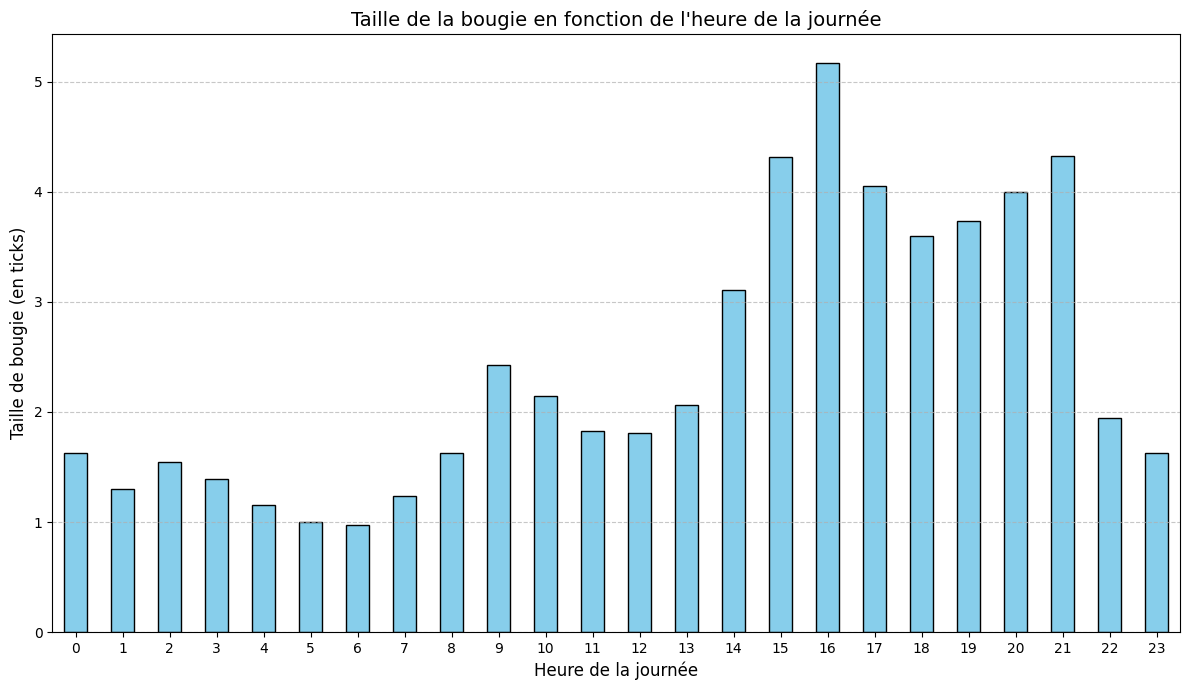

In [29]:
plot_average_candle_size_by_hour_in_tcks(df)


<Figure size 1600x1000 with 0 Axes>

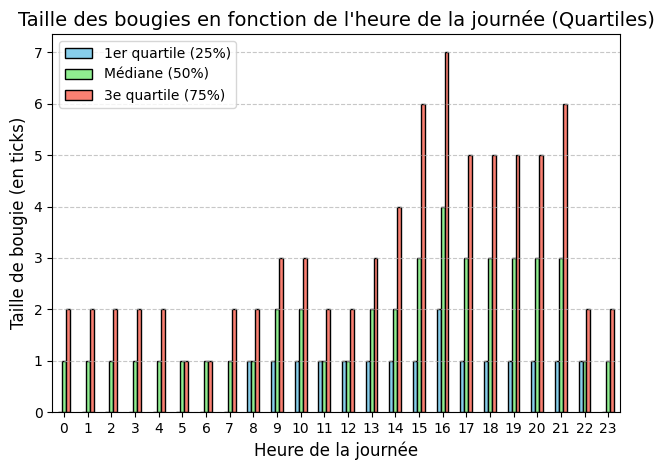

In [31]:
plot_candle_size_by_hour_in_quartiles(df)

In [13]:
df = create_df(timeFramesUsedInMinutes=["5"], instrument="ES", 
                    start_date = "2023-03-24 12:00", end_date = "2025-02-14 12:00") 

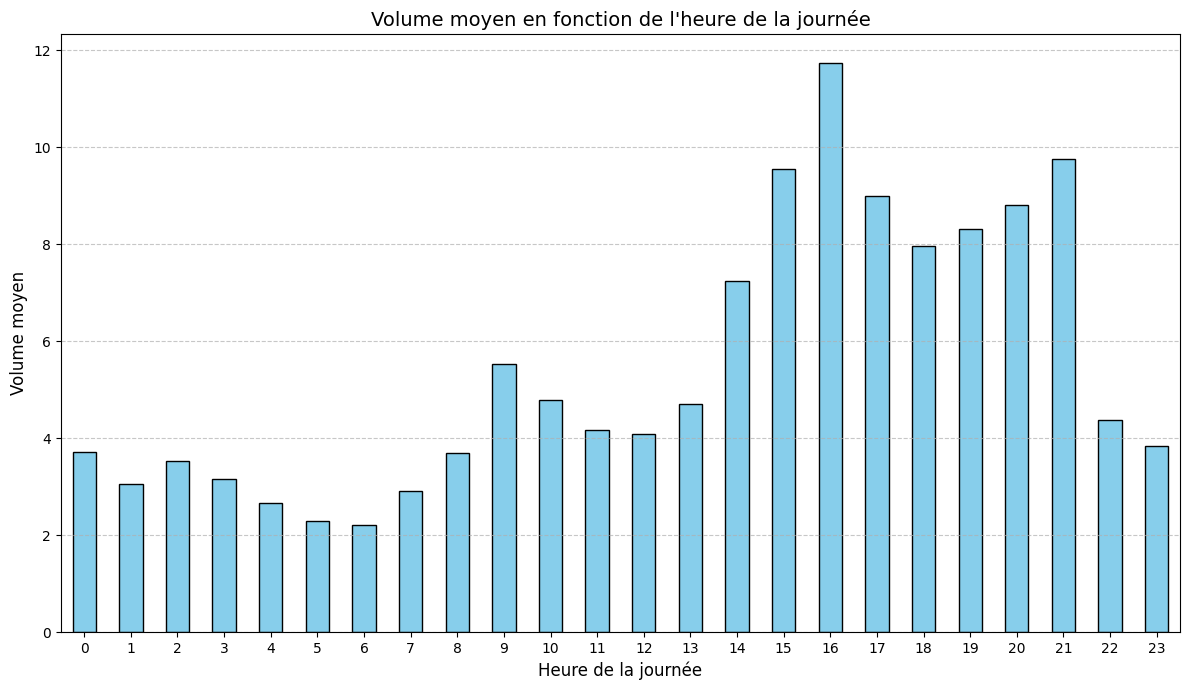

In [14]:
plot_average_candle_size_by_hour_in_tcks(df)

In [2]:
from processing_functions import load_object
import pandas as pd

filename = "size=1_timeframe=[[1]]_slInTicks=[[50, 70], [40, 70]]_tpInTicks=[[25, 70]]_KijunExitMethod=[1]_"\
    "slModifiers=[[[0.6, 0.15]], [[0.5, 0.12], [0.7, 0.2]], []]_xRatio=[0, 8]"

filepath = f"ES/[2023-03-24 12-00]_[2025-02-14 12-00]/{filename}.pkl"


df = load_object('trade_datas/'+filepath)[2][0]
# Créer une nouvelle colonne "hour" qui contient l'heure d'entrée de chaque trade
df['hour'] = df['entry_date'].dt.hour

# Calculer le gain ou la perte en fonction de la position
# Si position est "long", le profit est positif ; si "short", le profit est négatif
df['gain'] = df.loc[df['profit_including_fees_from_start(%)']>0, 'profit_including_fees_from_start(%)']
df['loss'] = df.loc[df['profit_including_fees_from_start(%)']<0, 'profit_including_fees_from_start(%)']

# Grouper par heure et calculer la somme des gains et des pertes

# hourly_gain = df.groupby('hour')['gain'].quantile([0.25, 0.5, 0.75]).unstack()#..agg(['mean'])
# hourly_loss = df.groupby('hour')['loss'].quantile([0.25, 0.5, 0.75]).unstack()#.agg(['mean'])
hourly_gain = df.groupby('hour')['gain'].agg(['sum'])
hourly_loss = df.groupby('hour')['loss'].agg(['sum'])
hours = hourly_loss.index
hourly_gain = [ x[0] for x in hourly_gain.values ]
hourly_loss = [ x[0] for x in hourly_loss.values ]

result = pd.DataFrame({
    'hourly gains': hourly_gain,
    'hourly loss': hourly_loss,
    'hourly total profit': [x1+x2 for (x1, x2) in zip(hourly_gain, hourly_loss)]
}, index=hours)
# result = pd.DataFrame({
#     'hourly gains 0.25': hourly_gain[0.25],
#     'hourly gains 0.5': hourly_gain[0.5],
#     'hourly gains 0.75': hourly_gain[0.75],

#     'hourly loss 0.25': hourly_loss[0.25],
#     'hourly loss 0.5': hourly_loss[0.5],
#     'hourly loss 0.75': hourly_loss[0.75],
# }, index=hours)

result


,hourly gains,hourly loss,hourly total profit
hour,,,
7,151.43712,-132.15104,19.28608
8,101.10820,-86.44596,14.66224
9,78.23592,-61.38916,16.84676
10,71.68644,-55.12496,16.56148
11,93.07740,-55.72780,37.34960
12,220.33040,-104.13856,116.19184
13,371.70156,-182.91464,188.78692
14,509.80176,-260.34356,249.45820
15,394.07392,-196.69588,197.37804


écrire des conditions pour ne pas entré en position ou pour sortie de position en fonction du momentum (taille des bougies ou indicateur):
- si on est en profit:
    - si on a 3 bougies consécutives qui deviennent plus petites et sont inférieur à la moyenne de ticks/h on ferme la position
    - si avalement dans sens inverse (sur unité supérieur ?)
    - si marteau/marteau inversé 